<a href="https://colab.research.google.com/github/nhv3/covid-cxr-copy/blob/master/Master_Notebook_CNN_V2_CS230.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Click on the URL link it gives you to mount the drive 
##NEW change comment to test git push
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
cd /content/drive/My Drive/CS230 Project/Data

/content/drive/My Drive/CS230 Project/Data


In [12]:
#Import the right libraries 
import pandas as pd 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pathlib
from distutils.dir_util import copy_tree
import os
import random
import shutil

#data_dir_train = pathlib.Path('/content/drive/My Drive/CS230 Project/Data/train_images')
#data_dir_val = pathlib.Path('/content/drive/My Drive/CS230 Project/Data/val_images')
#data_dir_test = pathlib.Path('/content/drive/My Drive/CS230 Project/Data/test_images')

#Declare all the COVID image paths
trainCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/train_images/COVID"
valCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/val_images/COVID"
testCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/test_images/COVID"

trainNONCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/train_images/NON_COVID"
valNONCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/val_images/NON_COVID"
testNONCOVID_dir = "/content/drive/My Drive/CS230 Project/Data/test_images/NON_COVID"

#Declare paths
covid_dir = "/content/drive/My Drive/CS230 Project/Data/COVID"
noncovid_dir ="/content/drive/My Drive/CS230 Project/Data/Non-COVID"
train_dir = "/content/drive/My Drive/CS230 Project/Data/Sets/Training"
sets_dir = "/content/drive/My Drive/CS230 Project/Data/Sets/"
train_dir_cov = "/content/drive/My Drive/CS230 Project/Data/Sets/Training/COVID"
train_dir_ncov = "/content/drive/My Drive/CS230 Project/Data/Sets/Training/Non-COVID"
dev_dir = "/content/drive/My Drive/CS230 Project/Data/Sets/Dev"
dev_dir_cov = "/content/drive/My Drive/CS230 Project/Data/Sets/Dev/COVID"
dev_dir_ncov = "/content/drive/My Drive/CS230 Project/Data/Sets/Dev/Non-COVID"
test_dir = "/content/drive/My Drive/CS230 Project/Data/Sets/Test"
test_dir_cov = "/content/drive/My Drive/CS230 Project/Data/Sets/Test/COVID"
test_dir_ncov = "/content/drive/My Drive/CS230 Project/Data/Sets/Test/Non-COVID"

#os.makedirs(covid_dir)
#os.makedirs(noncovid_dir)
#os.makedirs(train_dir_cov) 
#os.makedirs(train_dir_ncov)
#os.makedirs(dev_dir_cov)
#os.makedirs(dev_dir_ncov)
#os.makedirs(test_dir_cov)
#os.makedirs(test_dir_ncov)
covid_path = pathlib.Path('/content/drive/My Drive/CS230 Project/Data/COVID')
noncovid_path = pathlib.Path('/content/drive/My Drive/CS230 Project/Data/Non-COVID')

#Move all the COVID and Non-COVID Images into their own folders (done once)
##copy_tree(trainCOVID_dir, covid_dir)
##copy_tree(valCOVID_dir, covid_dir)
#copy_tree(testCOVID_dir, covid_dir)

#copy_tree(trainNONCOVID_dir, noncovid_dir)
#copy_tree(valNONCOVID_dir, noncovid_dir)
#copy_tree(testNONCOVID_dir, noncovid_dir)

#Count up data
image_count_covid = len(os.listdir(covid_dir))
image_count_noncovid = len(os.listdir(noncovid_dir))
print("Total images in COVID set: " + str(image_count_covid))
print("Total images in Non-COVID set: " + str(image_count_noncovid))

total_images = image_count_covid+image_count_noncovid
print("Total images: " + str(total_images))

Total images in COVID set: 242
Total images in Non-COVID set: 874
Total images: 1116


In [13]:

# Move the data to Training, Dev, and Test sets (80-10-10)
numdevtest = total_images//10

#Define dev/test covid:non-covid ratio

for ii in range(numdevtest//2):
  image = random.choice(os.listdir(covid_dir))
  os.rename((covid_dir+"/"+image), (test_dir_cov+"/"+image))

for ii in range(numdevtest//2):
  image = random.choice(os.listdir(noncovid_dir))
  os.rename((noncovid_dir+"/"+image), (test_dir_ncov+"/Non-"+image))

image_count_covid = len(os.listdir(covid_dir))
image_count_noncovid = len(os.listdir(noncovid_dir))
print("After populating test set...")
print("Total images in COVID set: " + str(image_count_covid))
print("Total images in Non-COVID set: " + str(image_count_noncovid))

After populating test set...
Total images in COVID set: 187
Total images in Non-COVID set: 819


In [14]:
#Populate dev set

for ii in range(numdevtest//2):
  image = random.choice(os.listdir(covid_dir))
  os.rename((covid_dir+"/"+image), (dev_dir_cov+"/"+image))

for ii in range(numdevtest//2):
  image = random.choice(os.listdir(noncovid_dir))
  os.rename((noncovid_dir+"/"+image), (dev_dir_ncov+"/"+image))

image_count_covid = len(os.listdir(covid_dir))
image_count_noncovid = len(os.listdir(noncovid_dir))
print("After populating dev set...")
print("Total images in COVID set: " + str(image_count_covid))
print("Total images in Non-COVID set: " + str(image_count_noncovid))

After populating dev set...
Total images in COVID set: 132
Total images in Non-COVID set: 764


In [15]:
#Train set 
for ii in range(image_count_covid):
  image = random.choice(os.listdir(covid_dir))
  os.rename((covid_dir+"/"+image), (train_dir_cov+"/"+image))

for ii in range(image_count_noncovid):
  image = random.choice(os.listdir(noncovid_dir))
  os.rename((noncovid_dir+"/"+image), (train_dir_ncov+"/"+image))

image_count_covid = len(os.listdir(covid_dir))
image_count_noncovid = len(os.listdir(noncovid_dir))
print("After populating training set...")
print("Total images in COVID set: " + str(image_count_covid))
print("Total images in Non-COVID set: " + str(image_count_noncovid))

After populating training set...
Total images in COVID set: 0
Total images in Non-COVID set: 0


Class Names: ['COVID' 'Non-COVID']
Found 896 images belonging to 2 classes.
Found 110 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


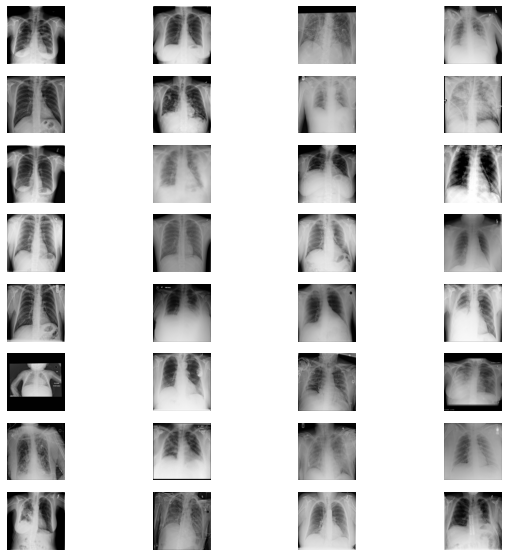

In [16]:


#CLASS_NAMES = np.array([item.name for item in train_dir if item.name != '.ipynb_checkpoints'])
CLASS_NAMES = np.array(os.listdir(train_dir))
print("Class Names: " + str(CLASS_NAMES))


import tensorflow as tf
# The 1./255 is to convert from uint8 to float32 in range [0,1].
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
image_count_train = len(os.listdir(train_dir_cov))+len(os.listdir(train_dir_ncov))
image_count_dev = len(os.listdir(dev_dir_cov))+len(os.listdir(dev_dir_ncov))
image_count_test = len(os.listdir(test_dir_cov))+len(os.listdir(test_dir_ncov))
##Getting images just for train for now. Will get the other in later. But use the train first to test some type of model to see baseline errors 
BATCH_SIZE = 32
IMG_HEIGHT = 640
IMG_WIDTH = 640
STEPS_PER_EPOCH_train = np.ceil(image_count_train/BATCH_SIZE)
STEPS_PER_EPOCH_test = np.ceil(image_count_test/BATCH_SIZE)
STEPS_PER_EPOCH_val = np.ceil(image_count_dev/BATCH_SIZE)

train_data_gen = image_generator.flow_from_directory(directory=str(train_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode = "binary")

test_data_gen = image_generator.flow_from_directory(directory=str(test_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode = "binary")

val_data_gen = image_generator.flow_from_directory(directory=str(dev_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES),
                                                     class_mode = "binary")




def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(BATCH_SIZE):
      ax = plt.subplot(8,4,n+1)
      plt.imshow(image_batch[n],cmap='binary')
      #plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      #plt.title(CLASS_NAMES[label_batch[n]==1.])
      plt.axis('off')

print(val_data_gen)
image_batch, label_batch = next(train_data_gen)
#print(CLASS_NAMES)
#print(label_batch)
show_batch(image_batch, label_batch)

In [17]:
from tensorflow.keras import layers, datasets, models



# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
#img_input = tf.keras.Input(shape=(640, 640, 3))
#input shape moved into first Conv2D layer
model=models.Sequential()
# First convolution extracts 16 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(layers.Conv2D(16, 3, activation='relu', input_shape=(640, 640, 3)))
model.add(layers.MaxPooling2D(2))

# Second convolution extracts 32 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

# Third convolution extracts 64 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window
model.add(layers.Conv2D(64, 3, activation='relu'))
model.add(layers.MaxPooling2D(2))

# Flatten feature map to a 1-dim tensor so we can add fully connected layers
model.add(layers.Flatten())

# Create a fully connected layer with ReLU activation and 512 hidden units
model.add(layers.Dense(512, activation='relu'))

# Create output layer with a single node and sigmoid activation
model.add(layers.Dense(1, activation='sigmoid'))

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
#model = Model(img_input, output)

#Print summar of the model
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 638, 638, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 319, 319, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 317, 317, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 158, 158, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 156, 156, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 78, 78, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 389376)            0

In [0]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
import numpy as np

#model.compile(loss='binary_crossentropy',
 #             optimizer=RMSprop(lr=0.1,momentum=0.9),
  #            metrics=['acc'])

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              metrics=['acc'])

In [0]:
history = model.fit(
      train_data_gen,
      steps_per_epoch=STEPS_PER_EPOCH_train,  # 2000 images = batch_size * steps
      epochs=15,
      validation_data=test_data_gen,
      validation_steps=STEPS_PER_EPOCH_test,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/15
28/28 - 22s - loss: 1.3063 - acc: 0.8225 - val_loss: 1.2993 - val_acc: 0.5000
Epoch 2/15
28/28 - 22s - loss: 0.3291 - acc: 0.8750 - val_loss: 0.6947 - val_acc: 0.7000
Epoch 3/15
28/28 - 21s - loss: 0.2794 - acc: 0.8929 - val_loss: 0.6604 - val_acc: 0.6909
Epoch 4/15
28/28 - 21s - loss: 0.1878 - acc: 0.9230 - val_loss: 0.5531 - val_acc: 0.8000
Epoch 5/15
28/28 - 21s - loss: 0.1415 - acc: 0.9453 - val_loss: 0.7262 - val_acc: 0.7636
Epoch 6/15
28/28 - 22s - loss: 0.0968 - acc: 0.9621 - val_loss: 0.8175 - val_acc: 0.7818
Epoch 7/15
28/28 - 21s - loss: 0.0619 - acc: 0.9766 - val_loss: 1.4331 - val_acc: 0.7455
Epoch 8/15
28/28 - 21s - loss: 0.0955 - acc: 0.9710 - val_loss: 1.7013 - val_acc: 0.7545
Epoch 9/15
28/28 - 21s - loss: 0.1366 - acc: 0.9431 - val_loss: 1.2686 - val_acc: 0.7273
Epoch 10/15
28/28 - 21s - loss: 0.0837 - acc: 0.9621 - val_loss: 1.1183 - val_acc: 0.7091
Epoch 11/15
28/28 - 21s - loss: 0.0519 - acc: 0.9833 - val_loss: 1.2704 - val_acc: 0.7727
Epoch 12/15
28/28 -

In [0]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')
#plt.ylim((0.5,1.5))